# Lecture 43

This lecture continues with Energy Balance example problems; it introduces the concept of steady state multiplicity in CSTRs.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

## Energy Balances on Ideal Reactors

### Batch Reactor

The material balance for species j in a well-mixed batch reactor is:

$$\frac{dN_j}{dt} = R_jV$$

In cases where we have either an incompressible fluid or our reactor operates at constant pressure, the energy balance on a batch reactor is:

$$\sum_j N_j \bar{C}_{p,j} \frac{dT}{dt} = -\sum_i \Delta H_{i} r_i V + \dot{Q}$$

A few notation conventions:  the bar over a property here means it is an intensive molar property for a species and it has units of "per mole".  $\dot{Q}$ is the rate of heat exhange with the surroundings.  It is given by:

$$\dot{Q} = UA(T_a - T)$$

### CSTR

The material balance for species j in a CSTR is:

$$\frac{dN_j}{dt} = F_{jf} - F_j + R_jV$$

If we have an incompressible fluid or a reactor operating at constant pressure, the energy balance on a CSTR is:

$$\sum_j N_j \bar{C}_{p,j} \frac{dT}{dt} = -\sum_i \Delta H_{i} r_i V + \sum_j F_{jf}(\bar{H}_{jf} - \bar{H}_j) + \dot{Q}$$

The rate of heat exchange is the same as in a batch reactor:

$$\dot{Q} = UA(T_a - T)$$

### PFR

The material balance for species j in a PFR is:

$$\frac{dF_j}{dV} = R_j$$

If we have an ideal gas or a reactor operating without a pressure drop, the energy balance for a PFR is:

$$\sum_j F_j \bar{C}_{p,j} \frac{dT}{dV} = -\sum_i \Delta H_{i} r_i + \dot{q}$$

For a PFR, we express the rate of heat transfer per unit volume, and it has a symbol $\dot{q}$:

$$\dot{q} = Ua(T_a - T)$$

## Example Problem 01

(Fogler, Example 12.3) 
	
This example considers adibatic operation of a CSTR with process constraints.  It is also a great example of a "word problem" with units given in real world engineering dimensions (for the US).

Propylene glycol ($C_3H_8O_2$ is produced by the hydrolysis of propylene oxide ($C_3H_6O$) in aqueous solutions with a dilute sulfuric acid catalyst ($H_2SO_4$):

$$C_3H_6O + H_2O \longrightarrow C_3H_8O_2$$

But we'll use the shorthand:

$$A + B \longrightarrow C$$

Over 900 million pounds of propylene glycol were produced in 2010, and the selling price was approximately \$0.80 per pound.  Propylene glycol makes up about 25\% of the major derivatives of propylene oxide.  When catalyzed by sulfuric acid, the reaction takes place readily at room temperature (T = 298K).

You are the engineer in charge of an adiabatic CSTR producing propylene glycol by this method.  Unfortunately, the reactor is beginning to leak, and you must replace it. (You told your boss several times that sulfuric acid was corrosive and that mild steel was a poor material for construction. They wouldn't listen.) There is a nice-looking, shiny overflow CSTR of 300-gal capacity standing idle.  It is glass-lined, and you would like to use it.

We are going to work this problem in lb-mass, s, ft$^3$, and lb-moles rather than g, mol, and m$^3$ to give the reader more practice in working in both English and Metric systems.  Many plants still use the English system of units.

You are feeding 2500 lb$_m$/h (43.04 lb-mol/h) of propylene oxide (A) to the reactor.  The feed stream consists of (1) an equivolumetric mixture of propylene oxide (46.62 ft$^3$/h) and methanol (46.62 ft$^3$/h), and (2) water containing 0.1 wt% $H_2SO_4$. The volumetric flow rate of water into the CSTR is 233.1 ft$^3$/h, which is 2.5 times the methanol-propylene oxide volumetric flowrate.  The corresponding molar feed rates of methanol and water are 71.87 lb-mol/h and 802.8 lb-mol/h, respectively.  The water-propylene oxide-methanol mixgure undergoes a slight decrease in volume upon mixing (approximately 3\%), but you can neglect this decrease in your calculations.  The temperature of both feed streams is 58$^\circ$F prior to mixing, but there is an immediate 17$^\circ$F temperautre rise upon mixing the two streames due to the heat of mixing. The entering temperature of the combined feed to the reactor is thus 75$^\circ$F.

Furusawa et al. state that under conditions similar to those at which you are operating, the reaction is first order in propylene oxide concentration, and apparent zero-order in excess water, with the rate constnat:

$$k = A\exp\left(-\frac{E_A}{RT}\right)$$

Where $E_A = 32,400$ BTU/lb-mol and $A = 16.96\times 10^{12}$ h$^{-1}$.

There is an important constraint on your operation: propylene oxide is a low boiling point substance.  With the mixture you are using, you cannot exceed an operating temperature of 125$^\circ$F, or you will lose too much propylene oxide by vaporization through the vent system.

Can you use the idle CSTR as a replacement for the leaking one if you operate it adiabatically?  If so, what will be the conversion of propylene oxide (A) to propylene glycol (C)?

Additional useful data about this system are compiled below.

\begin{align}		
    \Delta H^\circ &= -36,000 \ \textrm{BTU} \ \textrm{lb-mol}^{-1}  		               \\ 
    C_{PA} &= 35 \ \textrm{BTU} \ \textrm{lb-mol}^{-1} \ ^\circ\textrm{R}^{-1}                \\
    C_{PB} &= 18 \ \textrm{BTU} \ \textrm{lb-mol}^{-1} \ ^\circ\textrm{R}^{-1}                \\
    C_{PC} &= 46 \ \textrm{BTU} \ \textrm{lb-mol}^{-1} \ ^\circ\textrm{R}^{-1}               \\
    C_{PM} &= 19.5 \ \textrm{BTU} \ \textrm{lb-mol}^{-1} \ ^\circ\textrm{R}^{-1}               \\
\end{align}

**Note:** The reported heat of reaction, $\Delta H^\circ = -36,000 \ \textrm{BTU} \ \textrm{lb-mol}^{-1}$ was measured at 528 Rankine.

### Solution to Example Problem 01

We start this problem off as usual for most any reactor, by writing material balances.  We also have to allow for non-isothermal operation (a change in temperature from feed to exit), so we will write an energy balance on the CSTR.  The most general and straightforward approach is to just write balances on all species plus one energy balance.

\begin{align}
    0 &= F_{Af} - F_A + R_AV \\
    0 &= F_{Bf} - F_B + R_BV \\
    0 &= F_{Cf} - F_C + R_CV \\
    0 &= F_{Mf} - F_M \\
    0 &= -\sum_i \Delta H_i r_i V + \sum_j F_{jf}(H_{jf} - H_j) + \dot{Q}\\
\end{align}

Note that a balance on Methanol is not really necessary since it is clear that it isn't reacting and that $F_M = F_{Mf}$, but I'm including it so that we remember the methanol is there.  It is very important for the energy balance.

We would define production rates as usual:

\begin{align}
    R_A &= -r \\
    R_B &= -r \\
    R_C &= r
\end{align}

The reaction rate is specified as zero order in water (B) and first order in propylene oxide (A), so:

$$r = kC_A$$

And the rate constant is given by an Arrhenius expression, with parameters given in the problem statement:

$$k = A\exp\left(-\frac{E_A}{RT}\right)$$

Focusing on the energy balance, we have one reaction, so:

$$\sum_i \Delta H_i r_i V = \Delta HrV$$

And we have to allow that $\Delta H$ is usuall a function of temperature.  We do so using the $\Delta C_p$ for this reaction:

$$\Delta H(T) = \Delta H^\circ + \int_{T_0}^{T} \Delta C_p dT$$

Here, we have:

$$\Delta C_p = C_{p,C} - C_{p,A} - C_{p,B}$$

Substituting numbers, we can determine if it is zero or not:

$$\Delta C_p = \left[46 - 18 - 35\right] \ \textrm{BTU} \ \textrm{lb-mol}^{-1} \ \textrm{K}^{-1}$$

Which is non-zero:

$$\Delta C_p = -7 \ \textrm{BTU} \ \textrm{lb-mol}^{-1} \ \textrm{K}^{-1}$$

This means that our heat of reaction is temperature dependent; since the $\Delta C_p$ term is constant, we get a pretty easy expression:

$$\Delta H = \Delta H^\circ + \Delta C_p(T - T_0)$$ 

Finally, referencing lecture F22-587-L41, we know that:

$$\sum_j F_{jf}(H_{jf} - H_j) = \sum_j F_{jf}C_{p,j}(T_{f} - T)$$

At this point, we've specified every equation in terms of constants and our unknowns: $F_A$, $F_B$, $F_C$, $T$. The problem can be solved.

In [2]:
def P01(var):
    #Problem statement parameters
    FAf = 43.04 #lb-mol/h P.O.
    FBf = 802.8 #lb-mol/h Water
    FCf = 0.0   #         P.G
    FMf = 71.87 #lb-mol/H methanol
    Tf  = 75 + 459.67 #feed temperature in Rankine
    T0  = 528      #reference T for DH calculations.
    DH0 = -36000   #BTU/lb-mol
    
    QMf = 46.62    #ft3/h, volumetric feed of methanol
    QAf = 46.62    #ft3/h, volumetric feed of P.O.
    QBf = 233.1    #ft3/h, volumetric feed of water
    QCf = 0.0      
    Qf  = QMf + QAf + QBf #ft3/h
    
    V   = 300/7.481 #ft3
    tau = V/Qf   #h
    
    CPA = 35.0 #BTU/lb-mol/Rankine
    CPB = 18.0 #BTU/lb-mol/Rankine
    CPC = 45.0 #BTU/lb-mol/Rankine
    CPM = 19.5 #BTU/lb-mol/Rankine
    
    A   = 16.96e12 #1/h
    EA  = 32400    #BTU/lb-mol
    R   = 1.986    #BTU/lb-mol/Rankine
 
    DCP = CPC - CPB - CPA
   
    #Now calculate quantities at reactor internal/exit conditions
    FA = var[0]
    FB = var[1]
    FC = var[2]
    T  = var[3]
    
    CA = FA/Qf
    
    DH = DH0 + DCP*(T - T0)
    k  = A*np.exp(-EA/R/T)
    r  = k*CA

    RA = -r
    RB = -r
    RC =  r
    EB = -DH*r*V + FAf*CPA*(Tf - T) + FBf*CPB*(Tf - T) + FCf*CPC*(Tf - T) + FMf*CPM*(Tf - T)
    
    F1 = FAf - FA + RA*V
    F2 = FBf - FB + RB*V
    F3 = FCf - FC + RC*V
    F4 = EB
    
    return [F1, F2, F3, F4]

var0 = [1, 1, 1, 611]
ans4a = opt.root(P01, var0)
print(ans4a.message)
print(f'function values are {ans4a.fun}')

FAf   = 43.04 #lbmol/h A
FA    = ans4a.x[0]
T     = ans4a.x[3]
XA    = (FAf - FA)/FAf

print(f'The CSTR will operate at {T:3.0f}R (or {T-460:3.0f}F) and achieve a conversion of {XA:3.3f}')

The solution converged.
function values are [-6.86881663e-11 -6.87379043e-11  6.86881663e-11  2.53050530e-06]
The CSTR will operate at 611R (or 151F) and achieve a conversion of 0.842


### An Alternative (and Very Useful!) Solution

#### Focus on the Material Balance in Isolation

If we write a material balance on A:

$$0 = F_{Af} - F_A + R_AV$$

And we substitute the rate expression into our production rate:

$$0 = F_{Af} - F_A - kC_AV$$

We express $C_A$ in terms of flowrates:

$$0 = F_{Af} - F_A - k\frac{F_A}{Q_f}V$$

And we express flowrates in terms of conversion of A:

$$0 = F_{Af} - (F_{Af} - F_{Af}X_A) - k\frac{F_{Af} - F_{Af}X_A}{Q_f}V$$

This simplifies to:

$$0 = F_{Af}X_A - k\frac{F_{Af}(1 - X_A)}{Q_f}V$$

We can factor and cancel the flowrate of A:

$$0 = X_A - k\frac{(1 - X_A)}{Q_f}V$$

And we see a $V/Q_f$, which is a space time:

$$0 = X_A - k\tau(1 - X_A)$$

We can solve this for conversion as a function of $k$:

$$(X_A)_{MB} = \frac{k\tau}{1 + k\tau}$$

Of course, we don't know T until we solve for the steady state temperature by coupling this equation with the energy balance...however:

<div class = "alert alert-block alert-info">
    We know the rate constant is given by the Arrhenius expression, so the above expression allows us to calculate the fractional conversion of A predicted by the material balance as a function of temperature.
    </div>

#### Now Consider The Energy Balance

For a CSTR at steady state, the energy balance is:

$$0 = -\sum_i \Delta H_i r_i V + \sum_j F_{jf}(H_{jf} - H_j) + \dot{Q}$$

Simplifying for this particular reaction with adiabatic operation:

$$0 = -\Delta H r V + \sum_j F_{jf}C_{p,j}(T_{f} - T)$$

If we go back to our material balance:

$$0 = F_{Af} - F_A - rV$$

And we express it in terms of conversion of A:

$$0 = F_{Af}X_A - rV$$

We find:

$rV = F_{Af}X_A$

We substiute this into the energy balance:

$$0 = -\Delta H F_{Af}X_A + \sum_j F_{jf}C_{p,j}(T_{f} - T)$$

Which allows us to solve the the conversion of A predicted as a function of temperature by the energy balance:

$$\left(X_A\right)_{EB} = \frac{\sum_j F_{jf}C_{p,j}(T_{f} - T)}{\Delta H F_{Af}}$$

This is the analog of the one developed above from the Material Balance in isolation for $(X_A)_{MB}$ as a function of temperature.  Again, we don't know the temperature per se, but we can now graph the values of $(X_A)_{EB}$ and $(X_A)_{MB}$ as functions of temperature.  The point where the intersect is the solution to the problem.


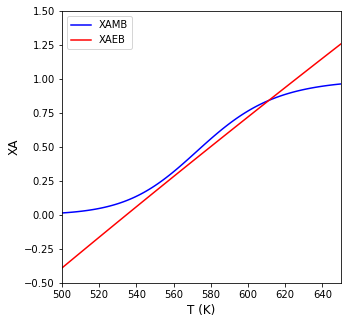

In [3]:
#Problem statement parameters
FAf = 43.04 #lb-mol/h P.O.
FBf = 802.8 #lb-mol/h Water
FCf = 0.0   #         P.G
FMf = 71.87 #lb-mol/H methanol
Tf  = 75 + 459.67 #feed temperature in Rankine
T0  = 528      #reference T for DH calculations.
DH0 = -36000   #BTU/lb-mol

QMf = 46.62    #ft3/h, volumetric feed of methanol
QAf = 46.62    #ft3/h, volumetric feed of P.O.
QBf = 233.1    #ft3/h, volumetric feed of water
QCf = 0.0      
Qf  = QMf + QAf + QBf #ft3/h

V   = 300/7.481 #ft3
tau = V/Qf   #h

CPA = 35.0 #BTU/lb-mol/Rankine
CPB = 18.0 #BTU/lb-mol/Rankine
CPC = 45.0 #BTU/lb-mol/Rankine
CPM = 19.5 #BTU/lb-mol/Rankine

A   = 16.96e12 #1/h
EA  = 32400    #BTU/lb-mol
R   = 1.986    #BTU/lb-mol/Rankine

DCP = CPC - CPB - CPA


DH   = lambda T: DH0 + DCP*(T - T0)
k    = lambda T: A*np.exp(-EA/R/T)
XAMB = lambda T: k(T)*tau/(1 + k(T)*tau)
XAEB = lambda T: (FAf*CPA + FBf*CPB + FCf*CPC + FMf*CPM)*(Tf - T)/DH(T)/FAf 
Tset = np.linspace(500, 650, 100)

plt.figure(1, figsize = (5, 5))
plt.plot(Tset, XAMB(Tset), color = 'blue', label = 'XAMB')
plt.plot(Tset, XAEB(Tset), color = 'red', label = 'XAEB')
plt.xlim(500, 650)
plt.ylim(-0.5, 1.5)
plt.xlabel('T (K)', fontsize = 12)
plt.ylabel('XA', fontsize = 12)
plt.legend()
plt.show()

#### Finding the Intersection

We can write a simple objective function that finds the temperature where the two curves intersect.  It can be solved with any nonlinear equation solver, but I chose `opt.newton()` since it is a univariate problem and the objective function is relatively well-behaved.

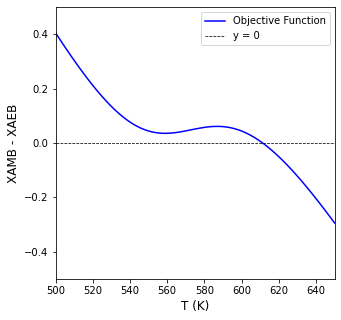

The CSTR operates at 611R (151F) and a conversion of 0.842


In [4]:
obj01 = lambda T: XAMB(T) - XAEB(T)

plt.figure(1, figsize = (5, 5))
plt.plot(Tset, obj01(Tset), color = 'blue', label = 'Objective Function')
plt.hlines(0, min(Tset), max(Tset), color = 'black', linestyle = 'dashed', linewidth = 0.75, label = 'y = 0')
plt.xlim(500, 650)
plt.ylim(-0.5, 0.5)
plt.xlabel('T (K)', fontsize = 12)
plt.ylabel('XAMB - XAEB', fontsize = 12)
plt.legend()
plt.show()

T4b = opt.newton(obj01, 611)

print(f'The CSTR operates at {T4b:3.0f}R ({T4b-460:2.0f}F) and a conversion of {XAMB(T4b):3.3f}')

## Example Problem 02

(Fogler Example 12.4)

Fantastic! Fred has located a cooling coil in equipment storage. You can use it for the propylene oxide hydrolysis system discussed in **Example Problem 01** (Fogler Example 12.3).

The cooling coil has 40 ft$^2$ of cooling surface, and the cooling water flow rate inside the coil is sufficiently large that a constant coolant temperature of 85$^\circ$F can be maintained.  A typical overall heat-transfer coefficient for such a coil is 100 BTU/h/ft$^2$/$^\circ$F.  Will the reactor satisfy the previous constraint of 125$^\circ$F maximum temperature if the cooling coil is used?

### Solution to Example Problem 03

This is almost identical to the first problem, except now our energy balance is not adiabatic, so we include the $\dot{Q}$ term:

$$\dot{Q} = UA(T_a - T)$$

Noting that $U$ and $A$ are constants given in the problem statement and that, for the conditions specified here, we can assume that the coolant temperature is constant at $85^\circ F$.

In [5]:
def P02(var):
    #Problem statement parameters
    FAf = 43.04    #lb-mol/h P.O.
    FBf = 802.8    #lb-mol/h Water
    FCf = 0.0      #         P.G
    FMf = 71.87    #lb-mol/H methanol
    Tf  = 75 + 459.67 #feed temperature in Rankine
    T0  = 528      #reference T for DH calculations.
    DH0 = -36000   #BTU/lb-mol
    UA  = 100*40   #BTU/h/Rankine
    Ta  = 85 + 459.67 #Rankine
    
    QMf = 46.62    #ft3/h, volumetric feed of methanol
    QAf = 46.62    #ft3/h, volumetric feed of P.O.
    QBf = 233.1    #ft3/h, volumetric feed of water
    QCf = 0.0      
    Qf  = QMf + QAf + QBf #ft3/h
    
    V   = 300/7.481 #ft3
    tau = V/Qf   #h
    
    CPA = 35.0 #BTU/lb-mol/Rankine
    CPB = 18.0 #BTU/lb-mol/Rankine
    CPC = 45.0 #BTU/lb-mol/Rankine
    CPM = 19.5 #BTU/lb-mol/Rankine
    
    A   = 16.96e12 #1/h
    EA  = 32400    #BTU/lb-mol
    R   = 1.986    #BTU/lb-mol/Rankine
 
    DCP = CPC - CPB - CPA
   
    #Now calculate quantities at reactor internal/exit conditions
    FA = var[0]
    FB = var[1]
    FC = var[2]
    T  = var[3]
    
    CA = FA/Qf
    
    Qd = UA*(Ta - T)
    DH = DH0 + DCP*(T - T0)
    k  = A*np.exp(-EA/R/T)
    r  = k*CA

    RA = -r
    RB = -r
    RC =  r
    EB = -DH*r*V + FAf*CPA*(Tf - T) + FBf*CPB*(Tf - T) + FCf*CPC*(Tf - T) + FMf*CPM*(Tf - T) + Qd
    
    F1 = FAf - FA + RA*V
    F2 = FBf - FB + RB*V
    F3 = FCf - FC + RC*V
    F4 = EB
    
    return [F1, F2, F3, F4]

var0 = [1, 1, 1, 600]
ans4c = opt.root(P02, var0)
print(ans4c.message)
print(f'function values are {ans4c.fun}')

FAf   = 43.04 #lbmol/h A
FA    = ans4c.x[0]
T     = ans4c.x[3]
XA    = (FAf - FA)/FAf

print(f'The CSTR will operate at {T:3.0f}R ({T-460:2.0f}F) and achieve a conversion of {XA:3.3f}')

The solution converged.
function values are [ 9.62755209e-10  9.62772972e-10 -9.62753433e-10 -3.48963222e-05]
The CSTR will operate at 558R (98F) and achieve a conversion of 0.299


### Applying the Alternative Solution Strategy to Example 02

Again, we can develop expressions for the fractional conversion predicted as a function of temperature from the material balance:

$$(X_A)_{MB} = \frac{k\tau}{1 + k\tau}$$

Note that it has not changed from Example Problem 01 because the Material Balance is fundamentally the same whether the reactor is isothermal, adiabatic, or non-adiabatic/non-isothermal.

We can also revisit the Energy Balance:

For a CSTR at steady state, the energy balance is:

$$0 = -\sum_i \Delta H_i r_i V + \sum_j F_{jf}(H_{jf} - H_j) + \dot{Q}$$

The only difference here is that we cannot set $\dot{Q} = 0$:

$$0 = -\Delta H r V + \sum_j F_{jf}C_{p,j}(T_{f} - T) + $\dot{Q}$$

And again we know that:

$$\dot{Q} = UA(T_a - T)$$

If we go back to our material balance:

$$0 = F_{Af} - F_A - rV$$

And we express it in terms of conversion of A:

$$0 = F_{Af}X_A - rV$$

We find:

$rV = F_{Af}X_A$

We substiute this into the energy balance:

$$0 = -\Delta H F_{Af}X_A + \sum_j F_{jf}C_{p,j}(T_{f} - T) + \dot{Q}$$

Which allows us to solve the the conversion of A predicted as a function of temperature by the energy balance for non-adiabatic operation:

$$\left(X_A\right)_{EB} = \frac{\sum_j F_{jf}C_{p,j}(T_{f} - T) + \dot{Q}}{\Delta H F_{Af}}$$

Now we just plot both conversion vs. T curves as a function of temperature and look for intersections.

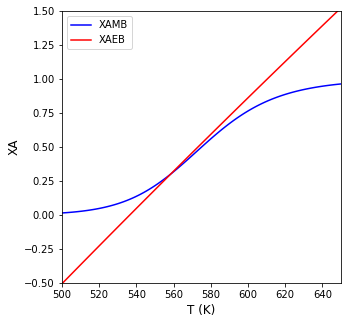

In [6]:
#Problem statement parameters
FAf = 43.04 #lb-mol/h P.O.
FBf = 802.8 #lb-mol/h Water
FCf = 0.0   #         P.G
FMf = 71.87 #lb-mol/H methanol
Tf  = 75 + 459.67 #feed temperature in Rankine
T0  = 528      #reference T for DH calculations.
DH0 = -36000   #BTU/lb-mol
UA  = 100*40   #BTU/h/Rankine
Ta  = 85 + 459.67 #Rankine

QMf = 46.62    #ft3/h, volumetric feed of methanol
QAf = 46.62    #ft3/h, volumetric feed of P.O.
QBf = 233.1    #ft3/h, volumetric feed of water
QCf = 0.0      
Qf  = QMf + QAf + QBf #ft3/h

V   = 300/7.481 #ft3
tau = V/Qf   #h

CPA = 35.0 #BTU/lb-mol/Rankine
CPB = 18.0 #BTU/lb-mol/Rankine
CPC = 45.0 #BTU/lb-mol/Rankine
CPM = 19.5 #BTU/lb-mol/Rankine

A   = 16.96e12 #1/h
EA  = 32400    #BTU/lb-mol
R   = 1.986    #BTU/lb-mol/Rankine

DCP = CPC - CPB - CPA

Qd   = lambda T: UA*(Ta - T)
DH   = lambda T: DH0 + DCP*(T - T0)
k    = lambda T: A*np.exp(-EA/R/T)
XAMB = lambda T: k(T)*tau/(1 + k(T)*tau)
XAEB = lambda T: (Qd(T) + (FAf*CPA + FBf*CPB + FCf*CPC + FMf*CPM)*(Tf - T))/DH(T)/FAf 

Tset = np.linspace(500, 650, 100)

plt.figure(1, figsize = (5, 5))
plt.plot(Tset, XAMB(Tset), color = 'blue', label = 'XAMB')
plt.plot(Tset, XAEB(Tset), color = 'red', label = 'XAEB')
plt.xlim(500, 650)
plt.ylim(-0.5, 1.5)
plt.xlabel('T (K)', fontsize = 12)
plt.ylabel('XA', fontsize = 12)
plt.legend()
plt.show()

We can again write a simple objective function that finds the point of intersection, i.e., where $XA_{MB} = XA_{EB}$

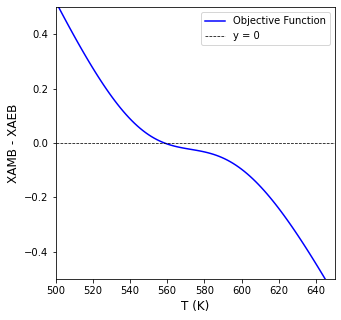

The CSTR operates at 558R (98F) and a conversion of 0.299


In [7]:
obj02 = lambda T: XAMB(T) - XAEB(T)

plt.figure(1, figsize = (5, 5))
plt.plot(Tset, obj02(Tset), color = 'blue', label = 'Objective Function')
plt.hlines(0, min(Tset), max(Tset), color = 'black', linestyle = 'dashed', linewidth = 0.75, label = 'y = 0')
plt.xlim(500, 650)
plt.ylim(-0.5, 0.5)
plt.xlabel('T (K)', fontsize = 12)
plt.ylabel('XAMB - XAEB', fontsize = 12)
plt.legend()
plt.show()

T4d, info = opt.newton(obj02, 560, full_output = True)

print(f'The CSTR operates at {T4d:3.0f}R ({T4d-460:2.0f}F) and a conversion of {XAMB(T4d):3.3f}')

### Example Problem 03: Steady State Multiplicity

Let's just change the problem parameters a little and see what happens.  First, we'll make the reaction just a bit more exothermic, setting the reference heat of reaction to:

$$\Delta H^\circ = -108,000 \ \textrm{BTU} \ \textrm{lb-mol}^{-1} \ ^\circ\textrm{R}$$

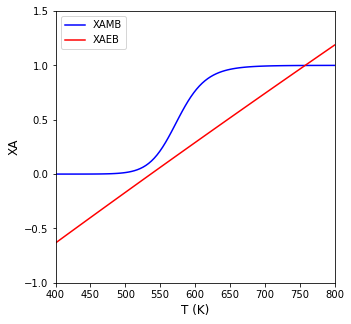

In [8]:
#Problem statement parameters
FAf = 43.04 #lb-mol/h P.O.
FBf = 802.8 #lb-mol/h Water
FCf = 0.0   #         P.G
FMf = 71.87 #lb-mol/H methanol
Tf  = 75 + 459.67 #feed temperature in Rankine
T0  = 528      #reference T for DH calculations.
DH0 = -108000   #BTU/lb-mol
UA  = 100*40   #BTU/h/Rankine
Ta  = 85 + 459.67 #Rankine

QMf = 46.62    #ft3/h, volumetric feed of methanol
QAf = 46.62    #ft3/h, volumetric feed of P.O.
QBf = 233.1    #ft3/h, volumetric feed of water
QCf = 0.0      
Qf  = QMf + QAf + QBf #ft3/h

V   = 300/7.481 #ft3
tau = V/Qf   #h

CPA = 35.0 #BTU/lb-mol/Rankine
CPB = 18.0 #BTU/lb-mol/Rankine
CPC = 45.0 #BTU/lb-mol/Rankine
CPM = 19.5 #BTU/lb-mol/Rankine

A   = 16.96e12 #1/h
EA  = 32400    #BTU/lb-mol
R   = 1.986    #BTU/lb-mol/Rankine

DCP = CPC - CPB - CPA

Qd   = lambda T: UA*(Ta - T)
DH   = lambda T: DH0 + DCP*(T - T0)
k    = lambda T: A*np.exp(-EA/R/T)
XAMB = lambda T: k(T)*tau/(1 + k(T)*tau)
XAEB = lambda T: (Qd(T) + (FAf*CPA + FBf*CPB + FCf*CPC + FMf*CPM)*(Tf - T))/DH(T)/FAf 

Tset = np.linspace(400, 800, 100)

plt.figure(1, figsize = (5, 5))
plt.plot(Tset, XAMB(Tset), color = 'blue', label = 'XAMB')
plt.plot(Tset, XAEB(Tset), color = 'red', label = 'XAEB')
plt.xlim(min(Tset), max(Tset))
plt.ylim(-1.0, 1.5)
plt.xlabel('T (K)', fontsize = 12)
plt.ylabel('XA', fontsize = 12)
plt.legend()
plt.show()

We find a single steady state solution:

In [9]:
obj03 = lambda T: XAMB(T) - XAEB(T)
T4d = opt.newton(obj03, 611)

print(f'The CSTR operates at {T4d:3.0f}R and a conversion of {XAMB(T4d):3.3f}')

The CSTR operates at 758R and a conversion of 0.999


Now we'll run this in a smaller reactor (10 gallons):

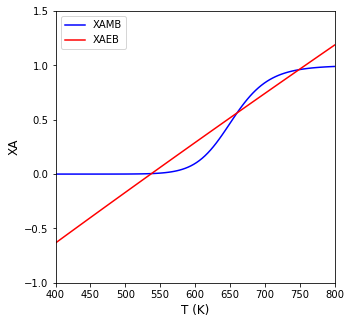

In [10]:
#Problem statement parameters
FAf = 43.04 #lb-mol/h P.O.
FBf = 802.8 #lb-mol/h Water
FCf = 0.0   #         P.G
FMf = 71.87 #lb-mol/H methanol
Tf  = 75 + 459.67 #feed temperature in Rankine
T0  = 528      #reference T for DH calculations.
DH0 = -108000   #BTU/lb-mol
UA  = 100*40   #BTU/h/Rankine
Ta  = 85 + 459.67 #Rankine

QMf = 46.62    #ft3/h, volumetric feed of methanol
QAf = 46.62    #ft3/h, volumetric feed of P.O.
QBf = 233.1    #ft3/h, volumetric feed of water
QCf = 0.0      
Qf  = QMf + QAf + QBf #ft3/h

V   = 10/7.481 #ft3
tau = V/Qf   #h

CPA = 35.0 #BTU/lb-mol/Rankine
CPB = 18.0 #BTU/lb-mol/Rankine
CPC = 45.0 #BTU/lb-mol/Rankine
CPM = 19.5 #BTU/lb-mol/Rankine

A   = 16.96e12 #1/h
EA  = 32400    #BTU/lb-mol
R   = 1.986    #BTU/lb-mol/Rankine

DCP = CPC - CPB - CPA

Qd   = lambda T: UA*(Ta - T)
DH   = lambda T: DH0 + DCP*(T - T0)
k    = lambda T: A*np.exp(-EA/R/T)
XAMB = lambda T: k(T)*tau/(1 + k(T)*tau)
XAEB = lambda T: (Qd(T) + (FAf*CPA + FBf*CPB + FCf*CPC + FMf*CPM)*(Tf - T))/DH(T)/FAf 

Tset = np.linspace(400, 800, 100)

plt.figure(1, figsize = (5, 5))
plt.plot(Tset, XAMB(Tset), color = 'blue', label = 'XAMB')
plt.plot(Tset, XAEB(Tset), color = 'red', label = 'XAEB')
plt.xlim(min(Tset), max(Tset))
plt.ylim(-1.0, 1.5)
plt.xlabel('T (K)', fontsize = 12)
plt.ylabel('XA', fontsize = 12)
plt.legend()
plt.show()

We see three possible steady state solutions.  To find them, we would just supply a few different initial guesses and loop our objective function solution over them.

In [11]:
guess = [530, 660, 740]
obj   = lambda T: XAMB(T) - XAEB(T)
T_SS  = np.zeros(3,)

for index, T0 in enumerate(guess):
    T_SS[index] = opt.newton(obj, T0)

XA = XAMB(T_SS)

for i in range(0,3):
    print(f'Steady state number {i+1} is a conversion of {XA[i]:3.3f} at {T_SS[i]:3.0f}R')

Steady state number 1 is a conversion of 0.005 at 538R
Steady state number 2 is a conversion of 0.573 at 661R
Steady state number 3 is a conversion of 0.955 at 744R
